In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/datasets/jena_climate_2009_2016.csv',index_col=0)

In [ ]:
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420551 entries, 01.01.2009 00:10:00 to 01.01.2017 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1+ MB


In [ ]:
float_data = data.iloc[:, :].values

In [ ]:
float_data

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

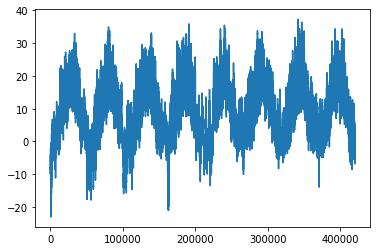

In [ ]:
import matplotlib.pyplot as plt
temp = float_data[:,1]
plt.plot(range(len(temp)),temp)

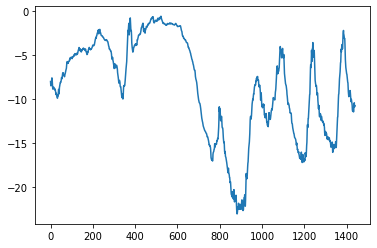

In [ ]:
plt.plot(range(1440),temp[:1440])

In [ ]:
mean = float_data[:200000].mean(axis=0)
std = float_data[:200000].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
print(float_data[:,1].mean(),float_data[:,1].std())

0.04211222174014537 0.9515228544484658


이 제너레이터 함수는 다음과 같은 매개변수가 있습니다:

* `data` : 코드 6-32에서 정규화한 부동 소수 데이터로 이루어진 원본 배열
* `lookback` : 입력으로 사용하기 위해 거슬러 올라갈 타임스텝
* `delay` : 타깃으로 사용할 미래의 타임스텝
* `min_index`와 `max_index` : 추출할 타임스텝의 범위를 지정하기 위한 `data` 배열의 인덱스. 검증 데이터와 테스트 데이터를 분리하는 데 사용합니다.
* `shuffle` : 샘플을 섞을지 시간 순서대로 추출할지 결정합니다.
* `batch_size` : 배치의 샘플 수
* `step` : 데이터를 샘플링할 타임스텝 간격. 한 시간에 하나의 데이터 포인트를 추출하기 위해 6으로 지정하겠습니다.
* steps_per_epoch * batch_size = 훈련 샘플 수


In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback//step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


500/500 [==============================] - 12s 18ms/step - loss: 1.6524 - val_loss: 0.9601
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.5507 - val_loss: 0.3835
Epoch 3/20
500/500 [==============================] - 8s 17ms/step - loss: 0.3124 - val_loss: 0.3734
Epoch 4/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2773 - val_loss: 0.3200
Epoch 5/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2612 - val_loss: 0.3137
Epoch 6/20
500/500 [==============================] - 9s 17ms/step - loss: 0.2500 - val_loss: 0.3256
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2419 - val_loss: 0.3236
Epoch 8/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2348 - val_loss: 0.3275
Epoch 9/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2282 - val_loss: 0.3388
Epoch 10/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2247 - val_loss: 0.3170

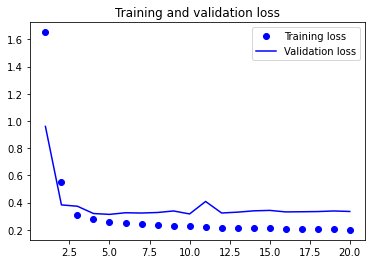

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


상식적인 수준의 기준점인 0.29보다 좋지 않다. 그 이유는 해당 모델이 핵심 정보를 찾지 못했기 때문이며 즉 시계열 데이터를 펼쳤기 때문에 시간개념을 잃어 버렸기 때문이다.

[과제] 순환 시퀀스 처리 모델을 적용하여 데이터 포인트의 시간 순서를 사용하여 과제를 수행하세요. (LSTM,GRU)

In [ ]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


500/500 [==============================] - 51s 91ms/step - loss: 0.3008 - val_loss: 0.2700
Epoch 2/20
500/500 [==============================] - 33s 65ms/step - loss: 0.2854 - val_loss: 0.2655
Epoch 3/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2775 - val_loss: 0.2676
Epoch 4/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2727 - val_loss: 0.2675
Epoch 5/20
500/500 [==============================] - 32s 65ms/step - loss: 0.2687 - val_loss: 0.2612
Epoch 6/20
500/500 [==============================] - 32s 65ms/step - loss: 0.2646 - val_loss: 0.2605
Epoch 7/20
500/500 [==============================] - 34s 67ms/step - loss: 0.2612 - val_loss: 0.2715
Epoch 8/20
500/500 [==============================] - 33s 65ms/step - loss: 0.2560 - val_loss: 0.2664
Epoch 9/20
500/500 [==============================] - 33s 65ms/step - loss: 0.2525 - val_loss: 0.2660
Epoch 10/20
500/500 [==============================] - 33s 65ms/step - loss: 0.2484 - val_los

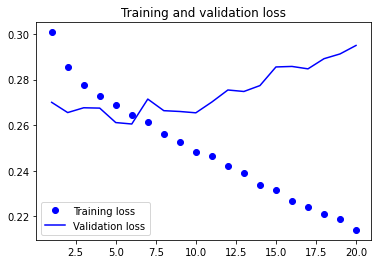

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model = Sequential()
model.add(layers.LSTM(32, input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


500/500 [==============================] - 35s 65ms/step - loss: 0.3080 - val_loss: 0.2755
Epoch 2/20
500/500 [==============================] - 32s 65ms/step - loss: 0.2727 - val_loss: 0.2638
Epoch 3/20
500/500 [==============================] - 32s 64ms/step - loss: 0.2625 - val_loss: 0.2731
Epoch 4/20
500/500 [==============================] - 32s 63ms/step - loss: 0.2505 - val_loss: 0.2683
Epoch 5/20
500/500 [==============================] - 32s 64ms/step - loss: 0.2429 - val_loss: 0.2833
Epoch 6/20
500/500 [==============================] - 32s 64ms/step - loss: 0.2347 - val_loss: 0.2854
Epoch 7/20
500/500 [==============================] - 32s 64ms/step - loss: 0.2260 - val_loss: 0.2914
Epoch 8/20
500/500 [==============================] - 32s 64ms/step - loss: 0.2193 - val_loss: 0.2944
Epoch 9/20
500/500 [==============================] - 32s 64ms/step - loss: 0.2140 - val_loss: 0.2940
Epoch 10/20
500/500 [==============================] - 32s 64ms/step - loss: 0.2090 - val_los

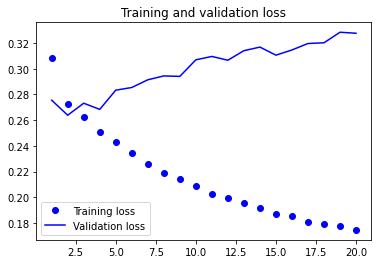

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[과제]과대적합을 줄이기 위한 방법을 수행하세요.

-순환 드롭아웃

-스태킹 순환 층

-양방행 RNN

In [ ]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
 
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


500/500 [==============================] - 326s 648ms/step - loss: 0.3236 - val_loss: 0.2839
Epoch 2/40
500/500 [==============================] - 322s 645ms/step - loss: 0.3063 - val_loss: 0.2807
Epoch 3/40
500/500 [==============================] - 323s 647ms/step - loss: 0.2994 - val_loss: 0.2790
Epoch 4/40
500/500 [==============================] - 321s 641ms/step - loss: 0.2952 - val_loss: 0.2728
Epoch 5/40
500/500 [==============================] - 321s 642ms/step - loss: 0.2889 - val_loss: 0.2799
Epoch 6/40
500/500 [==============================] - 318s 637ms/step - loss: 0.2868 - val_loss: 0.2778
Epoch 7/40
500/500 [==============================] - 318s 636ms/step - loss: 0.2806 - val_loss: 0.2838
Epoch 8/40
500/500 [==============================] - 320s 641ms/step - loss: 0.2771 - val_loss: 0.2739
Epoch 9/40
500/500 [==============================] - 323s 646ms/step - loss: 0.2769 - val_loss: 0.2733
Epoch 10/40
500/500 [==============================] - 319s 639ms/step - lo

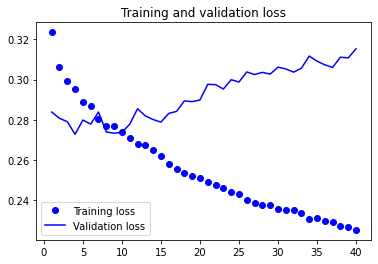

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
 
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


500/500 [==============================] - 693s 1s/step - loss: 0.3247 - val_loss: 0.2777
Epoch 2/40
500/500 [==============================] - 689s 1s/step - loss: 0.3009 - val_loss: 0.2763
Epoch 3/40
500/500 [==============================] - 690s 1s/step - loss: 0.2933 - val_loss: 0.2820
Epoch 4/40
500/500 [==============================] - 703s 1s/step - loss: 0.2879 - val_loss: 0.2727
Epoch 5/40
500/500 [==============================] - 702s 1s/step - loss: 0.2794 - val_loss: 0.2682
Epoch 6/40
500/500 [==============================] - 688s 1s/step - loss: 0.2735 - val_loss: 0.2650
Epoch 7/40
500/500 [==============================] - 691s 1s/step - loss: 0.2688 - val_loss: 0.2750
Epoch 8/40
500/500 [==============================] - 692s 1s/step - loss: 0.2637 - val_loss: 0.2782
Epoch 9/40
500/500 [==============================] - 691s 1s/step - loss: 0.2590 - val_loss: 0.2767
Epoch 10/40
500/500 [==============================] - 690s 1s/step - loss: 0.2573 - val_loss: 0.2841


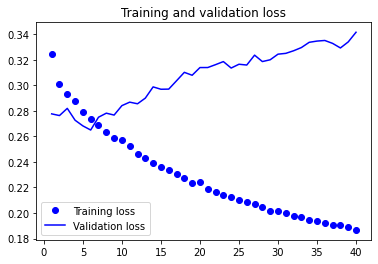

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()